In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import os,sys
opj = os.path.join
from copy import deepcopy
import pickle as pkl
from tqdm import tqdm

from sim_cosmology import p, load_dataloader_and_pretrained_model
# adaptive-wavelets modules
from losses import get_loss_f
from train import Trainer
from evaluate import Validator
from transform2d import DWT2d
from utils import get_1dfilts, get_2dfilts
from wave_attributions import Attributer
from visualize import cshow, plot_1dfilts, plot_2dfilts, plot_2dreconstruct

## load data and model

In [2]:
# get dataloader and model
(train_loader, test_loader), model = load_dataloader_and_pretrained_model(p, img_size=256)

In [9]:
# get image
data = iter(test_loader).next()[0].to(device)

# wavelet transform 
wt = DWT2d(wave='db5', mode='zero', J=4, init_factor=1, noise_factor=0).to(device)

data_t = wt(data)
recon = wt.inverse(data_t)

print("Reconstruction error={:.5f}".format(torch.norm(recon - data)**2/data.size(0)))

# get 1d wavelet filters
filt = get_2dfilts(wt)

Reconstruction error=0.00000


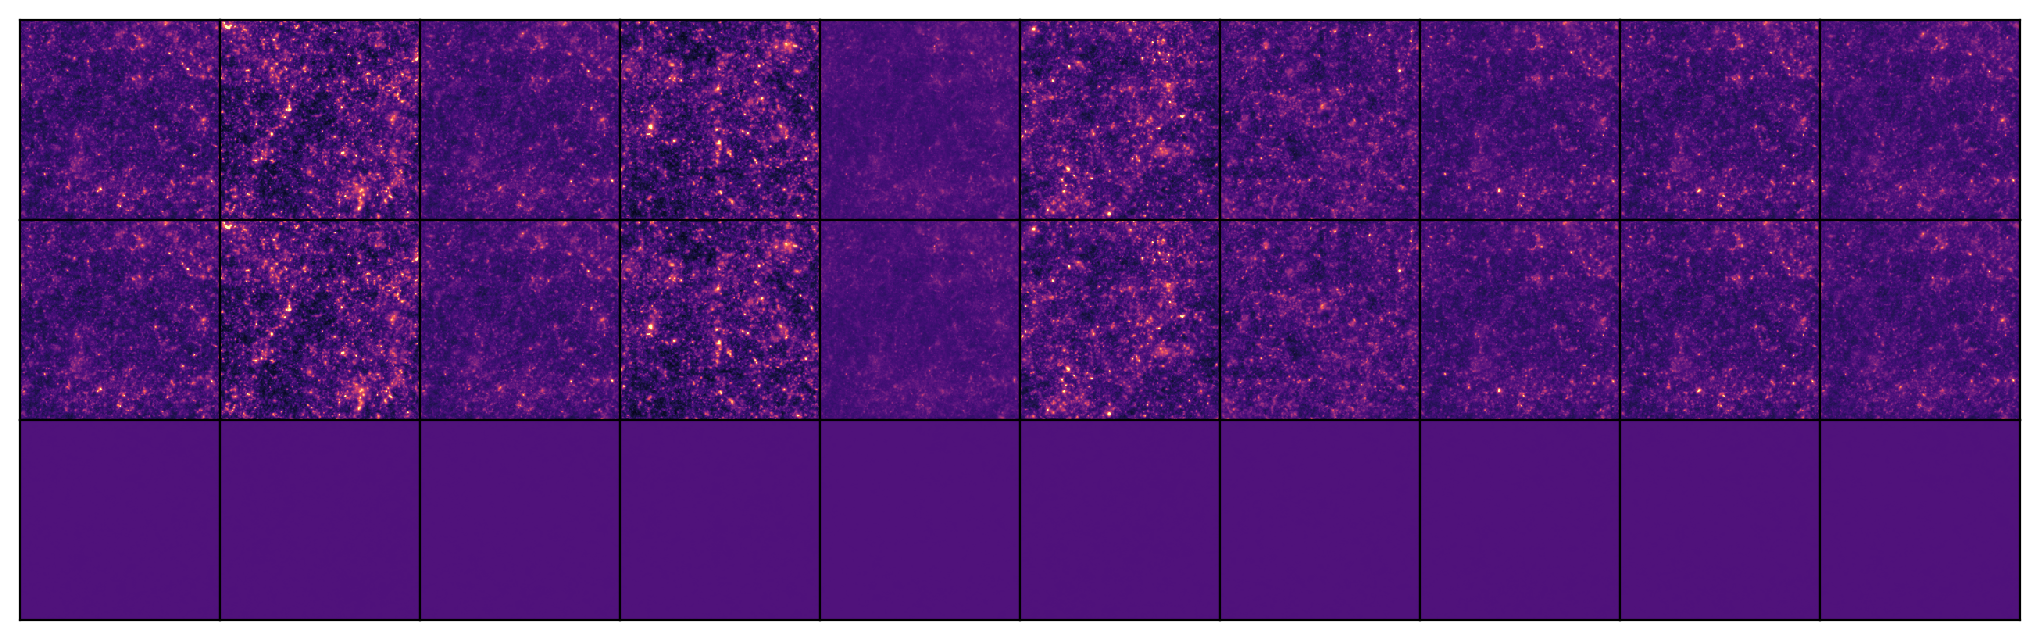

In [16]:
# plot original and reconstruction images
plot_2dreconstruct(data, recon)

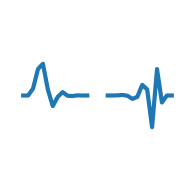

In [12]:
# plot wavelet filters
plot_1dfilts(filt[0], figsize=(1,1))

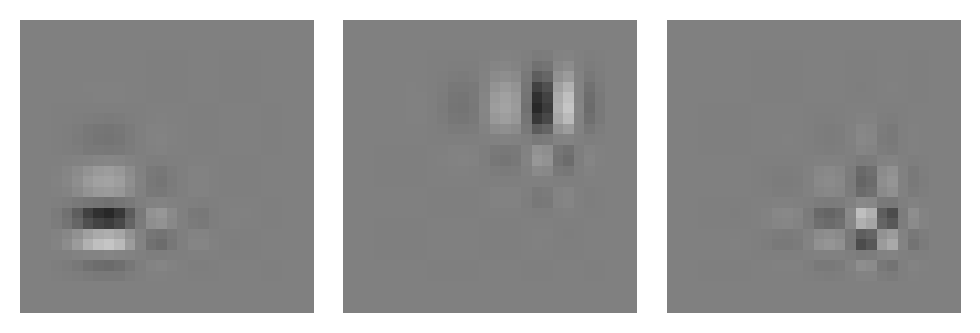

In [15]:
# plot wavelet filters
plot_2dfilts(filt[1], figsize=(5,5))